# **MACHINE LEARNING PROJECT**

**BANK CHURNER PREDICTION**


**Introduction**

In this project, we'll be building Machine Learning models in order to make predictions about bank churners - whether a customer of the specified bank will churn or not, given data about said customer. 

Specifically, if provided related data of a particular customer (Education Level, Income Range, and more), would the models built be able to correctly classify that customer into one of the two classes - 'Attrited' or 'Existing'

The libraries we'll be using in this project includes **Numpy, Pandas, Scikit Learn, MatPlotLib, and Seaborn. **

The dataset that we'll be using to train the data is called **BankChurner.csv**



# **I.Data Exploration:**


### 1.Prerequisites:
We'll load the required libraries and the dataset itself

In [ ]:
import numpy as np
import pandas as pd
import matplotlib                 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls -ltr "/content/drive/MyDrive/Colab Notebooks"

total 3253
-rw------- 1 root root     317 Feb 15 04:04 Untitled0.ipynb
-rw------- 1 root root 1818650 Feb 22 05:20 Data_Science_Cheatsheet.pdf
-rw------- 1 root root 1510880 Apr 20 08:26 BankChurners.csv


## 2.Data Import & Exploration:

We will now proceed to load the data onto a variable **'df'**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BankChurners.csv")

In [ ]:
df.head(20)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


We'll have a look over information regarding the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

From the results above, we can see that:

*   There are 10127 samples
*   A total of 23 features are available
*   There are both **categorical** & **numerical** variables in the dataset
*   The dataset has no null value in any of the features



-> During dataset preprocessing, we can skip over null value cleanup 

We'll also have a look over some statistics of each individual features

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


We will proceed to prune features mentioned in the notes of the dataset's author:

1. *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1*
2. *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2*
3. *CLIENTNUM*

-> We'll be left with 20 features.

In [ ]:
df = df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis = 1)

In [ ]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

We will proceed to create two separate lists for categorial attributes and numerical.

In [ ]:
cat_vars = list(df.select_dtypes(include='object').columns)
num_vars = list(df.select_dtypes(exclude='object').columns)

We will check the numerical features for any issues, graphically

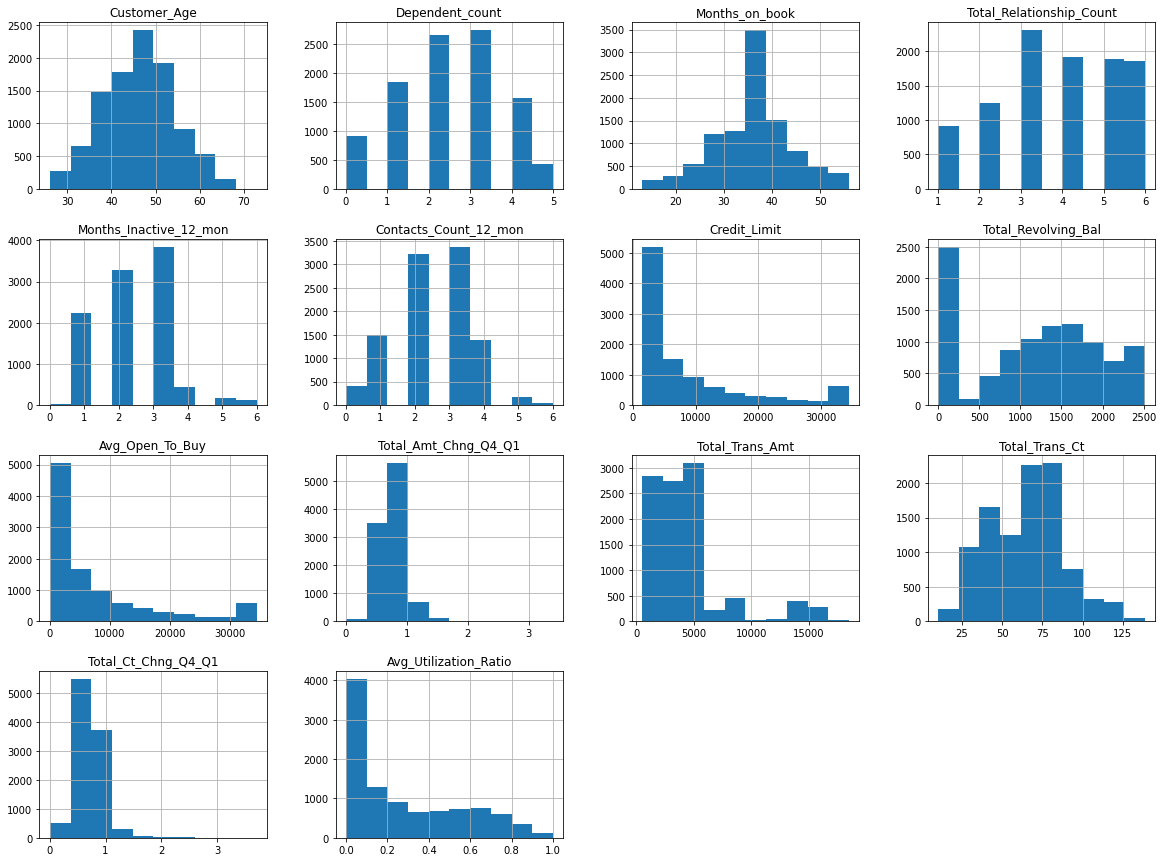

In [ ]:
df[num_vars].hist(bins=10, figsize = (20,15))
plt.show()

The histograms illustrate that Customer_Age variable follow normal distribution, while some attributes are highly skewed, for example 
* *Credit_Limit*
* *Avg_Open_To_Buy*
* *Total_Amt_Chng_Q4_Q1*
* *Total_Ct_Chng_Q4_Q1*

In [ ]:
df[cat_vars].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


From the summary table, we can see the most frequent values of each variable and its frequency in the dataset.


The 'Attrition_Flag' column contains the categorical value representing whether a customer has churned or not. Therefore, we will pick it as our **target variable**

We will have a look at the ratio between Churned (Attrited) and Existing customers in the target variable column

In [ ]:
churn_count = df["Attrition_Flag"].value_counts()
print(churn_count)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


<function matplotlib.pyplot.show>

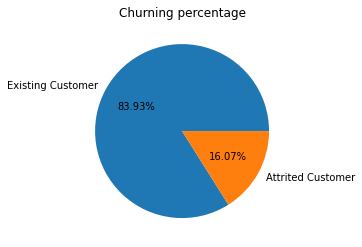

In [ ]:
plt.pie(churn_count,autopct = '%1.2f%%', labels=df.Attrition_Flag.unique())
plt.title('Churning percentage')
plt.show

Here, we can observe that: although is the smaller on, at 16.07%, it is still quite a large amount of customers churned from our bank. Therefore, to be able to predict whether a customer will churn or not in order to develop strategies to keep them from churning is key for increasing profit.

Let's have a look at some statistics of numerical variables

In [ ]:
df[num_vars].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


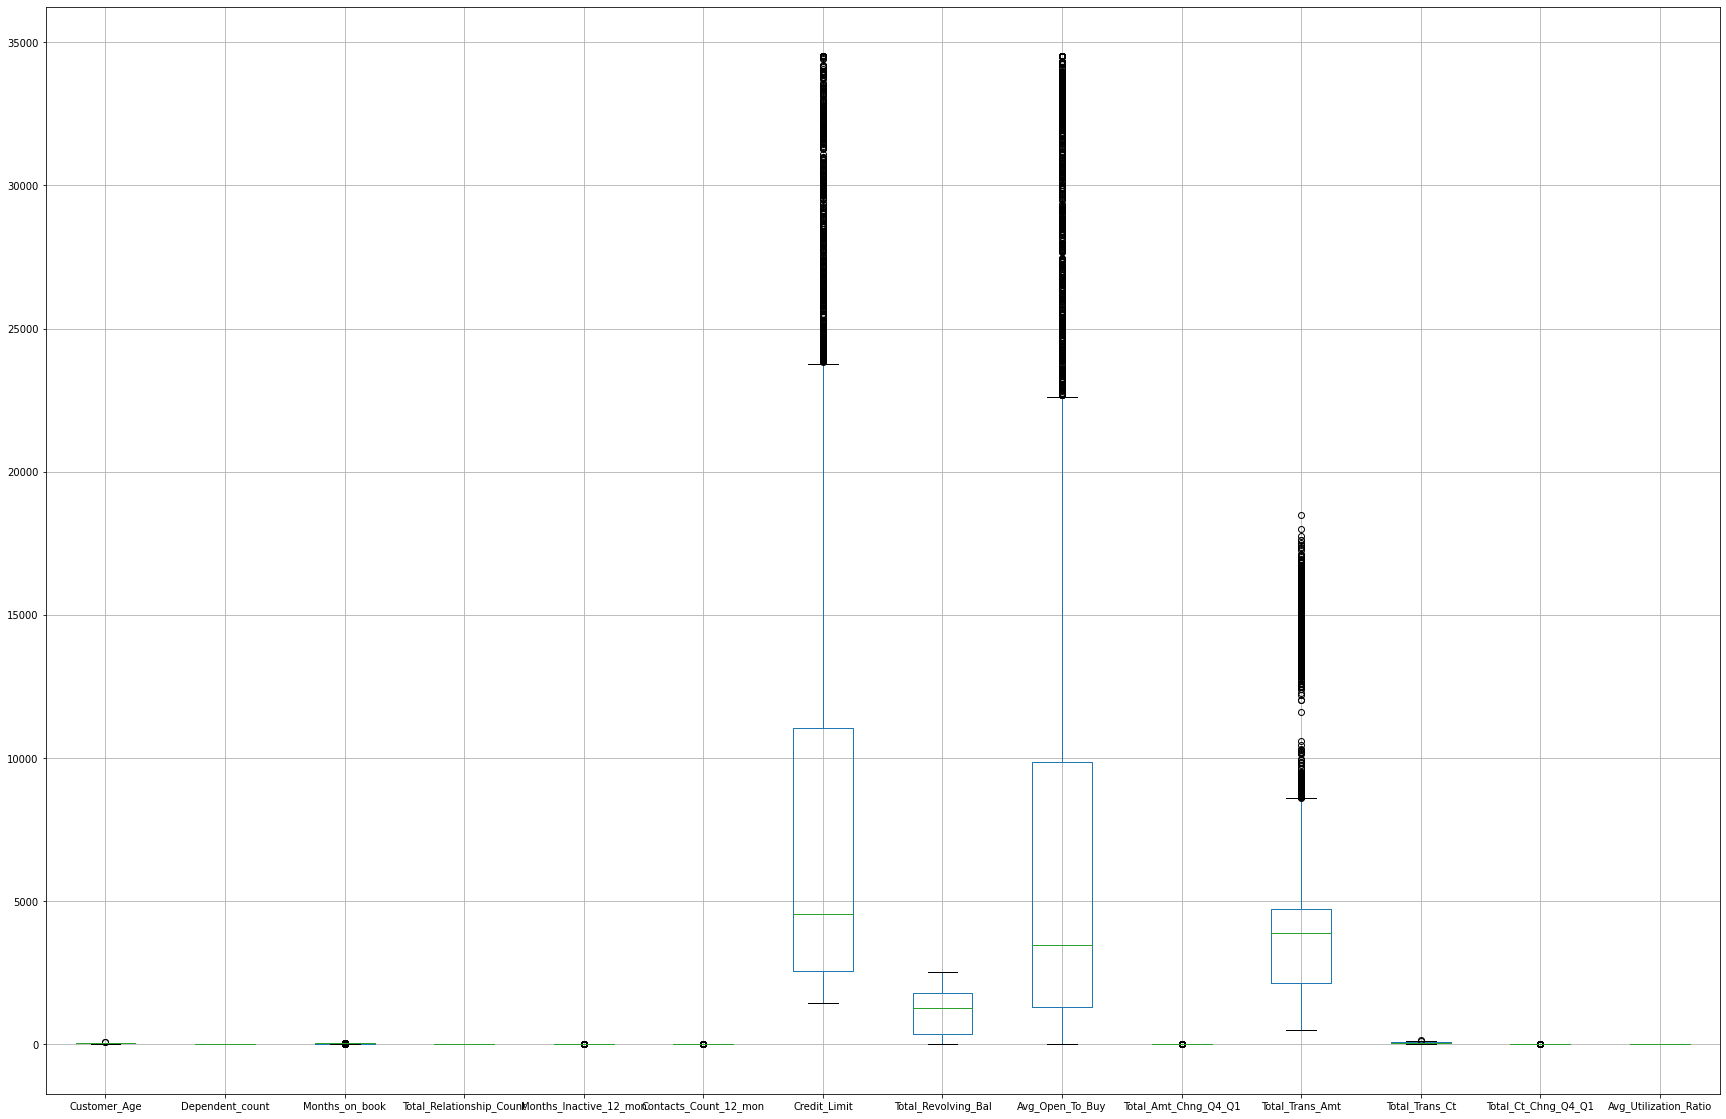

In [ ]:
df[num_vars].boxplot(figsize=(30,20))
plt.show()

The boxplots reveal a great number of outliers in 
* *Credit_Limit*
* *Avg_Open_To_Buy*
* *Total_Trans_Amt*

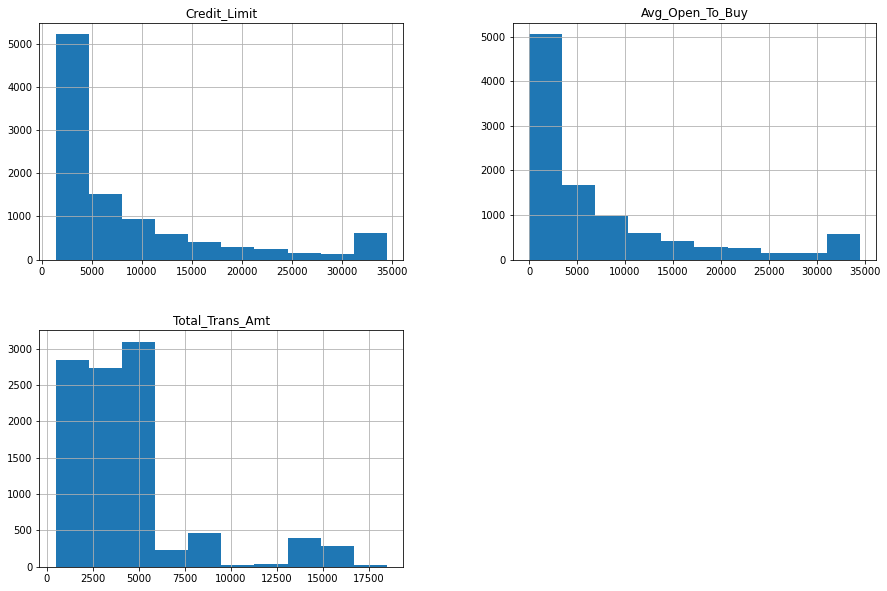

In [ ]:
outlier = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']
df[outlier].hist(bins=10, figsize=(15,10))
plt.show()

As showed above, the distributions of those suspected variable are skewed and need to be taken care of

# **II.Data preparation:**

## *1. Feature selection:*

In this part, we will deal with highly correlated variable.

We'll utilize a heat map to visualize correlation between features.

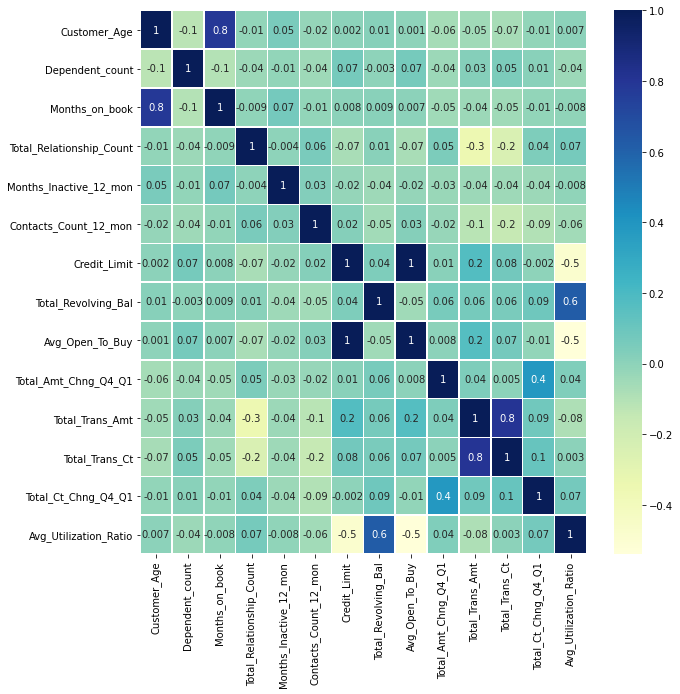

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(df.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

As there's perfect correlation between Avg_Open_To_Buy and Credit_limit, which mean the two variables present the same information. We'll prune either of them. In this case, *Avg_Open_To_Buy* is a feature, mentioned before, who has a lot of outliers, therefore is prioritized for pruning.

⇒ We'll be left with only 2 columns needed to be cleaned off outliers
* *Credit_Limit*
* *Total_Trans_Amt*

In [ ]:
df = df.drop(columns='Avg_Open_To_Buy', axis=1)
outlier.remove('Avg_Open_To_Buy')

## *2. Data Cleansing:*

  In the data cleaning task, we will come to remove outliers and deal with missing values.

In this case, we will remove the outliers that initially detected in the boxplots. To determine whether a datapoint is outlier or not, we will utilize the **interquartile method**.

An interquartile (IQR) will be calculated by the formula: **IQR = Q3 - Q1**

We will implement this logic into a 'while' loop, in order to 
* Automatically calculate IQR
* Purge rows whose value of the outlier features exceed the outlier threshold 
* Repeat until the number of outliers for each of the outlier-rich features are acceptable (in this case, less than 300)

In [ ]:
while True:
  IQR = df[outlier].quantile(0.75) - df[outlier].quantile(0.25)
  # Calculating the upper bounds of the two outlier-rich features
  upb_cl = round(df['Credit_Limit'].quantile(0.75) + 1.5*IQR[0], 3)
  upb_tt = round(df['Total_Trans_Amt'].quantile(0.75) + 1.5*IQR[1], 3)
  df = df[~((df ['Credit_Limit'] > upb_cl) | (df['Total_Trans_Amt'] > upb_tt))]
  outNum_cl = len(df[(df['Credit_Limit']>upb_cl) == True].index)
  outNum_tt = len(df[(df['Total_Trans_Amt']>upb_tt) == True].index)
  if outNum_cl < 300 and outNum_tt< 300 :
    break

Let's have a look at the statistics and the box plots of outlier variables again.

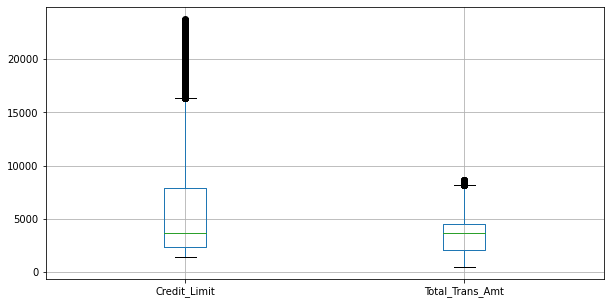

In [ ]:
df[outlier].boxplot(figsize=(10,5))
plt.show()

We'll have a look at the amount of outliers left for these features.

In [ ]:
upb_cl = round(df['Credit_Limit'].quantile(0.75) + 1.5*IQR[0], 3)
upb_tt = round(df['Total_Trans_Amt'].quantile(0.75) + 1.5*IQR[1], 3)
outNum_cl = len(df[(df['Credit_Limit']>upb_cl) == True].index)
outNum_tt = len(df[(df['Total_Trans_Amt']>upb_tt) == True].index)
print(outNum_cl, outNum_tt)

195 38


In [ ]:
df[outlier].describe()

,Credit_Limit,Total_Trans_Amt
count,8443.000000,8443.000000
mean,5917.758036,3473.224446
std,5115.762020,1616.368443
min,1438.300000,510.000000
25%,2358.000000,2064.000000
50%,3624.000000,3683.000000
75%,7940.500000,4520.000000
max,23742.000000,8618.000000


Let's come back to our dataset and see the statistics again.


In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000,8443.000000
mean,46.435390,2.328082,36.003672,3.968021,2.352363,2.463579,5917.758036,1144.413005,0.757103,3473.224446,60.978562,0.709307,0.307709
std,8.121089,1.298461,8.076269,1.492989,1.017655,1.111715,5115.762020,817.409562,0.226670,1616.368443,20.016154,0.245939,0.283105
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2358.000000,0.000000,0.623000,2064.000000,43.000000,0.571000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3624.000000,1255.000000,0.730000,3683.000000,65.000000,0.694000,0.232000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,7940.500000,1768.000000,0.857000,4520.000000,77.000000,0.822000,0.556000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,23742.000000,2517.000000,3.397000,8618.000000,113.000000,3.714000,0.999000


In [ ]:
df[outlier].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 10125
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Credit_Limit     8443 non-null   float64
 1   Total_Trans_Amt  8443 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 197.9 KB


## *3. Feature engineering:*

Since Machine learning algorithms require input and target variables to be numerical so in this part, we will transform our categorical values into numeric ones.

We'll be using **SKLearn's LabelEncoder** to deal with categorical variables.
Fit and transform categorical variables, including our target attribute.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_trans = df.copy()
for i in cat_vars:
  df_trans[i] = label_encoder.fit_transform(df[i])
df_trans.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
5,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,1.376,1088,24,0.846,0.311
8,1,37,1,3,5,2,2,0,36,5,2,0,22352.0,2517,3.355,1350,24,1.182,0.113
9,1,48,1,2,2,2,3,0,36,6,3,3,11656.0,1677,1.524,1441,32,0.882,0.144
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,0.831,1201,42,0.680,0.217
11,1,65,1,1,6,1,1,0,54,6,2,3,9095.0,1587,1.433,1314,26,1.364,0.174


We can see that our dataset now is purely numerical, as required to apply ML algorithms.

## *4. Feature scalling:*

As the entries of our dataset are of different scales, we're going to scale them to a certain range.

Because we only scales the input features, so we will set up target variable in y and drop the target column in transformed data frame.

In [ ]:
y = df_trans['Attrition_Flag']
df_trans = df_trans.drop(columns='Attrition_Flag', axis=1)
df_copy=df_trans
print(Counter(y))

Counter({1: 7042, 0: 1401})


In [ ]:
# After cleanup and segregation of target data, the number of independent variables left are 18
len(df_trans.columns)

18

We will use **StandardScaler** to redistribute the features with their mean μ = 0 and standard deviation σ =1.

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
input_vars = [i for i in df_trans.columns]
df_trans[input_vars] = standard_scaler.fit_transform(df_trans[input_vars])
df_trans.head(10)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.176759,1.184923,0.517503,-0.045158,-0.627528,-0.655825,-0.149052,0.371026,0.691258,-1.328980,0.482545,1.324073,-0.449511,2.549664,-1.441109,-0.948218,3.723476,-0.871491
1,0.315815,-0.843936,2.057880,-0.589825,0.739401,0.705151,-0.149052,0.990160,1.361094,-1.328980,-0.417019,0.457093,-0.343071,3.458530,-1.350159,-1.397882,12.217967,-0.716062
2,0.562102,1.184923,0.517503,-0.589825,-0.627528,0.024663,-0.149052,-0.000455,0.021421,-1.328980,-2.216149,-0.488667,-1.400131,8.104332,-0.981409,-2.047396,6.602413,-1.086972
3,-0.792476,-0.843936,1.287691,-0.045158,2.106330,0.705151,-0.149052,-0.248108,-0.648416,1.619148,-1.316584,-0.509193,1.679291,2.858502,-1.424403,-2.047396,6.602413,1.597706
4,-0.792476,1.184923,0.517503,1.044177,-0.627528,-0.655825,-0.149052,-1.857858,0.691258,-1.328980,-2.216149,-0.234927,-1.400131,6.255717,-1.644045,-1.647695,7.281485,-1.086972
5,-0.299902,1.184923,-0.252685,-0.589825,-0.627528,-1.336313,-0.149052,-0.000455,-0.648416,-1.328980,-0.417019,-0.372940,0.125510,2.730555,-1.475756,-1.847545,0.555832,0.011627
8,-1.161907,1.184923,0.517503,1.044177,0.739401,-0.655825,-0.149052,-0.000455,0.691258,-0.346270,-2.216149,3.212662,1.679291,11.461840,-1.313655,-1.847545,1.922107,-0.687803
9,0.192672,1.184923,-0.252685,-0.589825,0.739401,0.024663,-0.149052,-0.000455,1.361094,0.636439,0.482545,1.121745,0.651593,3.383526,-1.257352,-1.447844,0.702219,-0.578296
10,-0.546189,1.184923,2.057880,1.044177,2.106330,-2.016801,-0.149052,-0.619589,0.691258,0.636439,-0.417019,0.162301,0.394669,0.326033,-1.405842,-0.948218,-0.119173,-0.320426
11,2.286111,1.184923,-1.022874,1.588844,-0.627528,-1.336313,-0.149052,2.228429,1.361094,-0.346270,0.482545,0.621106,0.541483,2.982037,-1.335928,-1.747620,2.662173,-0.472322


Let's see the statistics of the dataset of scalling

In [ ]:
df_trans.describe()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03,8.443000e+03
mean,8.569349e-16,1.305019e-14,7.892669e-16,4.862732e-17,-4.389609e-15,4.084879e-15,1.794872e-15,2.377067e-16,-3.910767e-15,2.220946e-15,-7.461493e-16,-7.103412e-16,-1.425446e-15,3.088847e-17,-2.190202e-16,-8.500864e-16,-1.093350e-16,-4.046929e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.516485e+00,-8.439365e-01,-1.793062e+00,-1.679159e+00,-1.994456e+00,-2.016801e+00,-1.490523e-01,-2.848473e+00,-1.988089e+00,-2.311689e+00,-2.216149e+00,-8.756708e-01,-1.400131e+00,-3.340313e+00,-1.833369e+00,-2.547022e+00,-2.884254e+00,-1.086972e+00
25%,-6.693329e-01,-8.439365e-01,-1.022874e+00,-5.898250e-01,-6.275276e-01,-6.558249e-01,-1.490523e-01,-6.195891e-01,-6.484160e-01,-3.462703e-01,-4.170195e-01,-6.958824e-01,-1.400131e+00,-5.916568e-01,-8.718977e-01,-8.982558e-01,-5.623990e-01,-1.086972e+00
50%,-5.361548e-02,-8.439365e-01,-2.526853e-01,-4.515777e-02,-6.275276e-01,7.051508e-01,-1.490523e-01,-4.546528e-04,2.142081e-02,-3.462703e-01,-4.170195e-01,-4.483973e-01,1.352976e-01,-1.195762e-01,1.297897e-01,2.009215e-01,-6.224471e-02,-2.674386e-01
75%,6.852455e-01,1.184923e+00,5.175031e-01,1.044177e+00,7.394011e-01,7.051508e-01,-1.490523e-01,6.186798e-01,6.912576e-01,6.364390e-01,4.825450e-01,3.954175e-01,7.629271e-01,4.407437e-01,6.476479e-01,8.004728e-01,4.582411e-01,8.770821e-01
max,3.271259e+00,1.184923e+00,2.057880e+00,1.588844e+00,2.106330e+00,1.385639e+00,6.920886e+00,2.476083e+00,1.361094e+00,3.584567e+00,3.181239e+00,3.484388e+00,1.679291e+00,1.164714e+01,3.183111e+00,2.599127e+00,1.221797e+01,2.441967e+00


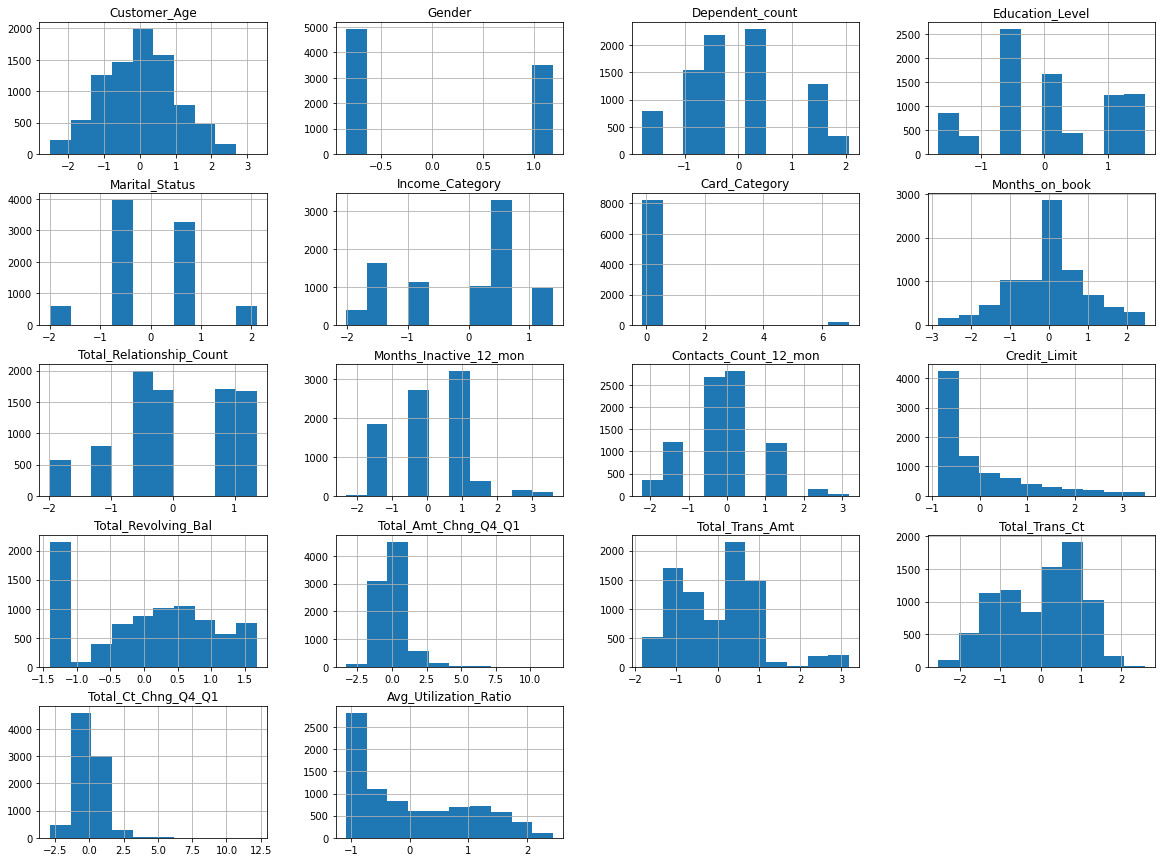

In [ ]:
df_trans.hist(bins=10, figsize = (20,15))
plt.show()

# **III.Models training:**

We call **x** as our **independent variables** and **y** our **target attribute**, we'll split our dataset into **train set** and **test set**.

In [ ]:
x = df_trans[input_vars]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.2, random_state=5)

We want to keep **20%** of the dataset for testing by assigning **test_size=0.2**, the **random_state** is set to **5** to ensure that the same sequences of random number are generated every time we execute the code.

Since there is a big gap between the number of observations of 2 classes of target variable, the dataset will be split using **stratified sampling method** by setting the parameter **stratify = y** to guarantee the data is representative.

We'll be trying out 4 different classification models:

1.   **Logistic Regression**
2.   **Decision Tree Classifier**
3.   **Support Vector Machine**
4.   **XGBoost Classifier**



### **_1. Logistic Regression Model:_**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(penalty = 'l2', random_state = 5)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The logistic regression is created using **`l2 regularization`** and **`random_state=5`**

In [ ]:
from sklearn.metrics import accuracy_score
y_predict_lg = logistic_regression.predict(X_test)
print(accuracy_score(y_test, y_predict_lg))

0.911190053285968


Here, we will use the **`accuracy`** score to see how accurately the model can predict on the **test set** when trained on the **train set**. 

As displayed, the **logistic regression model** can predict whether a customer churns or not with the accuracy of ***91.1%***

Let's check with the result on train set to see if it is overfitting, using 10-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
lg_results1 = cross_val_score(logistic_regression,X_train,y_train,cv=10,scoring='accuracy')
lg_results2 = cross_val_score(logistic_regression,X_test,y_test,cv=10,scoring='accuracy')

print ('Train score:',lg_results1.mean()*100, '% +/-',lg_results1.std())
print ('Test score:',lg_results2.mean()*100, '% +/-',lg_results2.std())

Train score: 90.46491343414422 % +/- 0.005178094157450783
Test score: 90.82241476472245 % +/- 0.01280252239349158


The scores on both training set and test set are **very much the same**, which mean that this model **generalises well** with ***unseen data***.

Let's plot a **confusion matrix** to see how many cases were predicted correctly/ incorrectly.

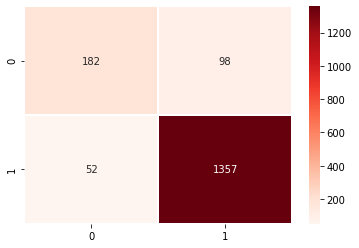

In [ ]:
from sklearn.metrics import confusion_matrix
cfm_lg = confusion_matrix(y_test, y_predict_lg)
sns.heatmap(cfm_lg, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

The confusion matrix shows us that:  
* **182** of them were ***correctly*** classified as ***No***.
* *98** were ***wrongly*** classified as ***Yes***.
* **52** were ***wrongly*** classified as ***No***
* **1357** were ***correctly*** classified as ***Yes***.


### **_2. Decision Tree Model:_**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

DTClassifier = DecisionTreeClassifier(max_depth = 5)

DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We'll try and visualize the built Decision Tree

[Text(697.5, 996.6, 'Total_Trans_Ct <= -0.324\ngini = 0.277\nsamples = 6754\nvalue = [1121, 5633]\nclass = t'),
 Text(348.75, 815.4000000000001, 'Total_Revolving_Bal <= -0.647\ngini = 0.47\nsamples = 2528\nvalue = [952, 1576]\nclass = t'),
 Text(174.375, 634.2, 'Total_Trans_Amt <= -1.019\ngini = 0.37\nsamples = 824\nvalue = [622, 202]\nclass = A'),
 Text(87.1875, 453.0, 'Total_Relationship_Count <= -0.313\ngini = 0.495\nsamples = 286\nvalue = [157, 129]\nclass = A'),
 Text(43.59375, 271.79999999999995, 'Total_Ct_Chng_Q4_Q1 <= 0.436\ngini = 0.348\nsamples = 156\nvalue = [121, 35]\nclass = A'),
 Text(21.796875, 90.59999999999991, 'gini = 0.274\nsamples = 134\nvalue = [112, 22]\nclass = A'),
 Text(65.390625, 90.59999999999991, 'gini = 0.483\nsamples = 22\nvalue = [9, 13]\nclass = t'),
 Text(130.78125, 271.79999999999995, 'Total_Trans_Amt <= -1.533\ngini = 0.4\nsamples = 130\nvalue = [36, 94]\nclass = t'),
 Text(108.984375, 90.59999999999991, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]\nc

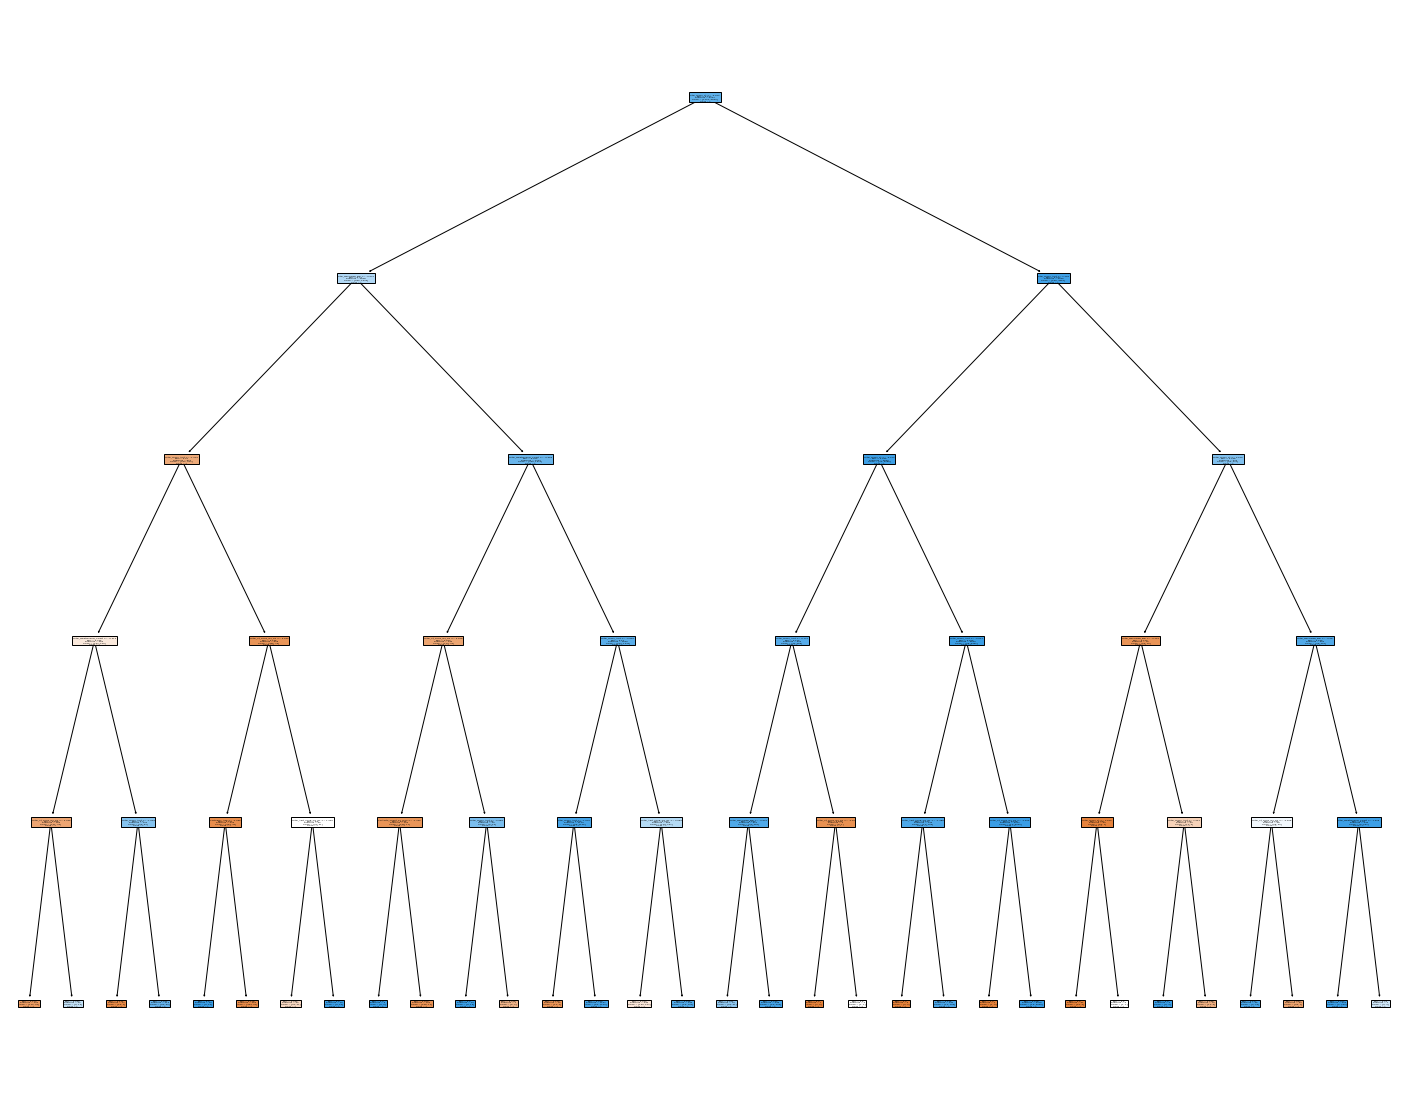

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(DTClassifier, 
                   feature_names=X_train.columns.values,  
                   class_names=y_train.name,
                   filled=True)

In [ ]:
y_predict_dt = DTClassifier.predict(X_test)
print(accuracy_score(y_test, y_predict_dt))

0.9325044404973357


As displayed, the **decision tree model** can predict whether a customer churns or not with the accuracy of ***93.2%***

Let's check with the result on train set to see if it is overfitting, using 10-fold cross validation

In [ ]:
c

print ('Train score:',dt_results1.mean()*100, '% +/-',dt_results1.std())
print ('Test score:',dt_results2.mean()*100, '% +/-',dt_results2.std())

Train score: 92.84913434144204 % +/- 0.008336131001497684
Test score: 92.7197802197802 % +/- 0.020296043261629888


The scores on both training set and test set are **also very much the same**, which mean that this model also **generalises well** with ***unseen data***.

Let's plot a **confusion matrix** to see how many cases were predicted correctly/ incorrectly.

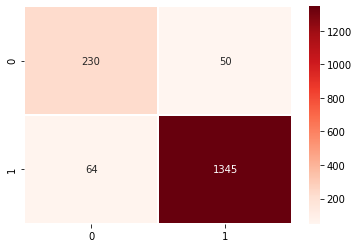

In [ ]:
cfm_dt = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cfm_dt, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

The confusion matrix shows us that:  
* **230** of them were ***correctly*** classified as ***No***.
* *50** were ***wrongly*** classified as ***Yes***.
* **64** were ***wrongly*** classified as ***No***
* **1345** were ***correctly*** classified as ***Yes***.


## **_3. Support Vector Machine:_**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

steps = [('SVM', SVC(kernel='poly'))]

pipeline = Pipeline(steps) # define Pipeline object

In [ ]:
# To find optimal C and Gamma

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5, 1], 'SVM__gamma':[10,1,0.1,0.01, 100]} # Dictionary where values are lists

# Initiate GridSearchCV with 5 folds cross validation

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipeline, param_grid =parameters, cv=5 )

In [ ]:
# Here, we're trying to find the best values for C and gamma, which will take quite a bit of time to process
grid.fit(X_train,y_train)

print ("score = ", grid.score(X_test,y_test))

print (grid.best_params_)

score =  0.9230313795145056
{'SVM__C': 0.001, 'SVM__gamma': 1}


In [ ]:
#Using the newly-found combination of ideal values for C and Gamma, we can then build a SVM model
steps_with_parameters = [('SVM', SVC(kernel='poly', C=0.001, gamma=1))]

poly_kernel_svm_clf = Pipeline (steps_with_parameters)

In [ ]:
poly_kernel_svm_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('SVM',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1,
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
y_predict_svm = poly_kernel_svm_clf.predict(X_test)
print(accuracy_score(y_test, y_predict_svm))

0.9230313795145056


As displayed, the **SVM model** can predict whether a customer churns or not with the accuracy of ***92.3%***

Let's check with the result on train set to see if it is overfitting, using 10-fold cross validation

In [ ]:
svm_results1 = cross_val_score(poly_kernel_svm_clf,X_train,y_train,cv=10,scoring='accuracy')
svm_results2 = cross_val_score(poly_kernel_svm_clf,X_test,y_test,cv=10,scoring='accuracy')

print ('Train score:',svm_results1.mean()*100, '% +/-',svm_results1.std())
print ('Test score:',svm_results2.mean()*100, '% +/-',svm_results2.std())

Train score: 92.21222879684419 % +/- 0.007117380794824106
Test score: 90.11235559312482 % +/- 0.019280312136307678


The scores on both training set and test set have **only a bit of difference**, which mean that this model **generalises relatively well** with ***unseen data***.

Let's plot a **confusion matrix** to see how many cases were predicted correctly/ incorrectly.

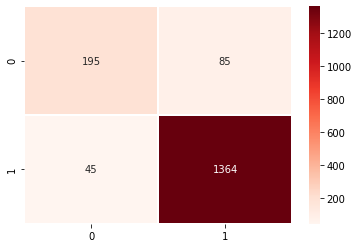

In [ ]:
cfm_svm = confusion_matrix(y_test, y_predict_svm)
sns.heatmap(cfm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

The confusion matrix shows us that:  
* **195** of them were ***correctly*** classified as ***No***.
* *85** were ***wrongly*** classified as ***Yes***.
* **45** were ***wrongly*** classified as ***No***
* **1364** were ***correctly*** classified as ***Yes***.

## **_4. XGBoost Classifier:_**

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Here, we will use the model's default value for 'n_estimators' of 100.
Meaning it will automatically build 100 trees for this single model

Let's see how well the model be able to perform classification on our dataset.

In [ ]:
y_predict_xgb = XGB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_xgb))

0.9656601539372409


As displayed, the **XGBoost model** can predict whether a customer churns or not with the accuracy of ***96.5%***

Let's check with the result on train set to see if it is overfitting, using 10-fold cross validation

In [ ]:
xgb_results1 = cross_val_score(XGB_model,X_train,y_train,cv=10,scoring='accuracy')
xgb_results2 = cross_val_score(XGB_model,X_test,y_test,cv=10,scoring='accuracy')

print ('Train score:',xgb_results1.mean()*100, '% +/-',xgb_results1.std())
print ('Test score:',xgb_results2.mean()*100, '% +/-',xgb_results2.std())

Train score: 96.47580539119002 % +/- 0.005709543726233141
Test score: 95.61883629191324 % +/- 0.016982169058085386


The scores on both training set and test set are **also very much the same**, which mean that this model also **generalises well** with ***unseen data***.

Let's plot a **confusion matrix** to see how many cases were predicted correctly/ incorrectly.

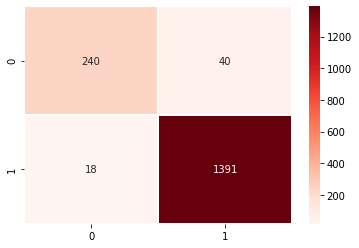

In [ ]:
cfm_xgb = confusion_matrix(y_test, y_predict_xgb)
sns.heatmap(cfm_xgb, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()

The confusion matrix shows us that:  
* **240** of them were ***correctly*** classified as ***No***.
* *40** were ***wrongly*** classified as ***Yes***.
* **18** were ***wrongly*** classified as ***No***
* **1391** were ***correctly*** classified as ***Yes***.


# **IV. Conclusion**
In this project, we have used 4 different ML algorithms to predict whether a customer will churn or not. The performance, measured using 10-fold Cross Validation method, is as followed (*ranked in descending order*):
1.  **XGBoost Classifier**: approx. ***95.6%***
2.  **Decision Tree Classifier**: approx. ***92.6%***
3.  **Logistic Regression**: approx. ***90.8%***
4.  **Support Vector Machine**: approx. ***90.1%***


Overall, all four models seem to perform well - a little too well - on this dataset with only little to no signs of overfitting. 

Further tuning to the hyperparameter of each model **AND** trying out other methods, such as *SGD Classifer, AdaBoost Classifier and  Linear SVC* could also be an improvement to the results at hand. 

Additionally, we can try and rebuild the models using a different dataset, with different features (possibly), as the dataset's author described themselves: *'We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.'*

# **Reference**
https://www.kaggle.com/sakshigoyal7/credit-card-customers
